# Loading the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
import seaborn as sns

In [5]:
from subprocess import check_output

# Reading the Dataset

In [6]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [7]:
mcdonalds.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [8]:
mcdonalds.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

# Checking for the Number of Counts based on Category

In [9]:
mcdonalds['Category'].value_counts().head(10)

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [13]:
mcdonalds['Serving Size'].value_counts().head(10)

16 fl oz cup      45
12 fl oz cup      38
22 fl oz cup      20
20 fl oz cup      16
30 fl oz cup       7
21 fl oz cup       7
5.7 oz (161 g)     5
32 fl oz cup       5
3.9 oz (111 g)     3
7.1 oz (201 g)     3
Name: Serving Size, dtype: int64

# Fats on Their Menu

In [14]:
grp_by_mcdonalds=mcdonalds.groupby(['Category'],as_index=False)['Total Fat (% Daily Value)','Trans Fat','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)'].agg(np.max)
grp_by_mcdonalds.columns=['Category','Max_Fat','Max_Trans_Fat','Max_Sat_Fat','Max_Cholestrol']

grp_by_mcdonalds

,Category,Max_Fat,Max_Trans_Fat,Max_Sat_Fat,Max_Cholestrol
0,Beef & Pork,66,2.5,96,53
1,Beverages,4,0.0,8,3
2,Breakfast,93,1.5,100,192
3,Chicken & Fish,182,1.0,101,89
4,Coffee & Tea,48,1.5,101,32
5,Desserts,19,0.0,35,10
6,Salads,33,0.0,29,29
7,Smoothies & Shakes,50,1.0,102,30
8,Snacks & Sides,37,0.0,27,16


In [15]:
mcdonalds=mcdonalds.merge(grp_by_mcdonalds,left_on=['Category'],right_on=['Category'])
fatty_mcdonalds=mcdonalds.loc[mcdonalds['Total Fat (% Daily Value)']==mcdonalds.Max_Fat,['Category','Item','Total Fat (% Daily Value)','Cholesterol (% Daily Value)']]
fatty_mcdonalds

,Category,Item,Total Fat (% Daily Value),Cholesterol (% Daily Value)
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),93,192
47,Beef & Pork,Double Quarter Pounder with Cheese,66,53
82,Chicken & Fish,Chicken McNuggets (40 piece),182,89
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,33,23
88,Salads,Premium Southwest Salad with Crispy Chicken,33,17
98,Snacks & Sides,Large French Fries,37,0
103,Desserts,Baked Apple Pie,19,0
130,Beverages,1% Low Fat Milk Jug,4,3
231,Coffee & Tea,Frappé Chocolate Chip (Large),48,32
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),50,25


In [17]:
fatty_mcdonalds=mcdonalds.loc[mcdonalds['Trans Fat']==mcdonalds.Max_Trans_Fat,['Category','Item','Total Fat (% Daily Value)','Trans Fat','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)']]
fatty_mcdonalds.sort_values(by='Trans Fat',ascending=False)[0:19]

,Category,Item,Total Fat (% Daily Value),Trans Fat,Saturated Fat (% Daily Value),Cholesterol (% Daily Value)
47,Beef & Pork,Double Quarter Pounder with Cheese,66,2.5,96,53
26,Breakfast,"Steak, Egg & Cheese Bagel",53,1.5,63,99
231,Coffee & Tea,Frappé Chocolate Chip (Large),48,1.5,101,32
228,Coffee & Tea,Frappé Caramel (Large),42,1.5,87,32
251,Smoothies & Shakes,Shamrock Shake (Large),35,1.0,73,29
250,Smoothies & Shakes,Shamrock Shake (Medium),29,1.0,61,24
249,Smoothies & Shakes,Chocolate Shake (Large),36,1.0,74,29
248,Smoothies & Shakes,Chocolate Shake (Medium),30,1.0,62,24
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),50,1.0,102,25
246,Smoothies & Shakes,Strawberry Shake (Large),36,1.0,75,30


Double Quarter Pounder with Cheese is the most unhealthiest item on the menu with 2.5g of trans fat. 
40 Chicken McNuggets has more than the daily alotted value for total fat.

# Anything that Will Not Give Me Cholestrol:

In [22]:
g = mcdonalds.sort_values(by=['Total Fat (% Daily Value)','Cholesterol (% Daily Value)'])
g.loc[:,['Category','Item','Total Fat (% Daily Value)','Cholesterol (% Daily Value)']][0:38]

,Category,Item,Total Fat (% Daily Value),Cholesterol (% Daily Value)
100,Snacks & Sides,Side Salad,0,0
101,Snacks & Sides,Apple Slices,0,0
110,Beverages,Coca-Cola Classic (Small),0,0
111,Beverages,Coca-Cola Classic (Medium),0,0
112,Beverages,Coca-Cola Classic (Large),0,0
113,Beverages,Coca-Cola Classic (Child),0,0
114,Beverages,Diet Coke (Small),0,0
115,Beverages,Diet Coke (Medium),0,0
116,Beverages,Diet Coke (Large),0,0
117,Beverages,Diet Coke (Child),0,0


Based on the information about McDonald's, it has been determined that most items are unhealthy, however, there are better alternatives to have when going out to McDonald's.

### Breakfast Counts as an Example:

In [18]:
breakfast = mcdonalds[mcdonalds['Category']=='Breakfast']
breakfast

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Max_Fat,Max_Trans_Fat,Max_Sat_Fat,Max_Cholestrol
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,3,17,10,0,25,15,93,1.5,100,192
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,3,18,6,0,25,8,93,1.5,100,192
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,2,14,8,0,25,10,93,1.5,100,192
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,2,21,15,0,30,15,93,1.5,100,192
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,2,21,6,0,25,10,93,1.5,100,192
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,3,26,15,2,30,20,93,1.5,100,192
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,3,19,10,8,15,15,93,1.5,100,192
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,4,19,15,8,20,20,93,1.5,100,192
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,3,20,2,8,15,10,93,1.5,100,192
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,4,20,6,8,15,15,93,1.5,100,192


Based on the information that is given for both serving size and categories listed, it seems that McDonald's is making progress in offering more products, however, they are still lacking in the menu offerings for healthier food. With coffee and tea being the most offered, it has been determined that consumers can drink too much to get into the sugar and caffeine crash during the day.

# Checking for NA Values

In [13]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         260 non-null int64
Calories from Fat                260 non-null int64
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    260 non-null int64
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           260 non-null int64
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null int64
Di

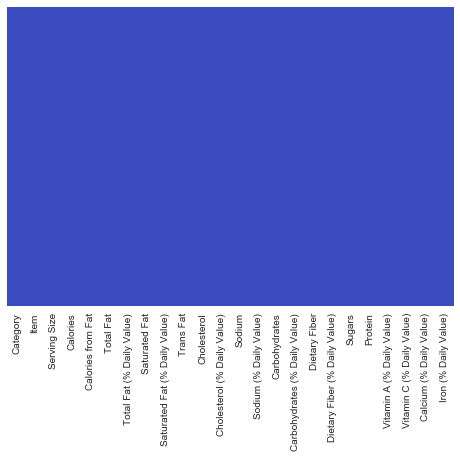

In [14]:
sns.heatmap(mcdonalds.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

No NA Values have been found in the McDonald's dataset.

# Exploratory Data Analysis

## Overview of the Categories of Calories

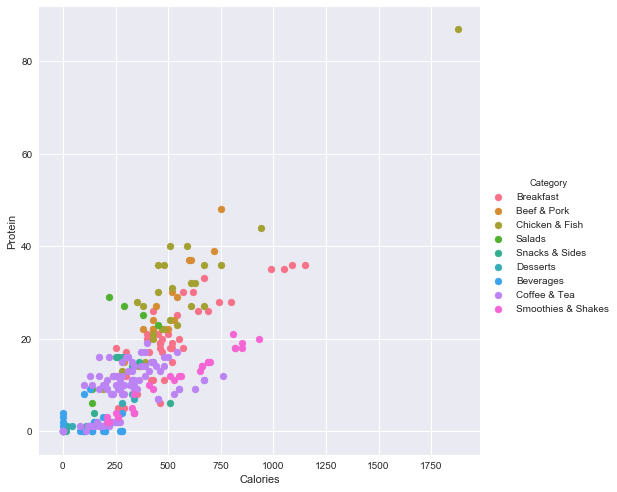

In [31]:
plt.figure(figsize=(20,20))
sns.FacetGrid(data=mcdonalds, hue='Category', size=7).map(plt.scatter, 'Calories','Protein').add_legend()

# Protein Comparison

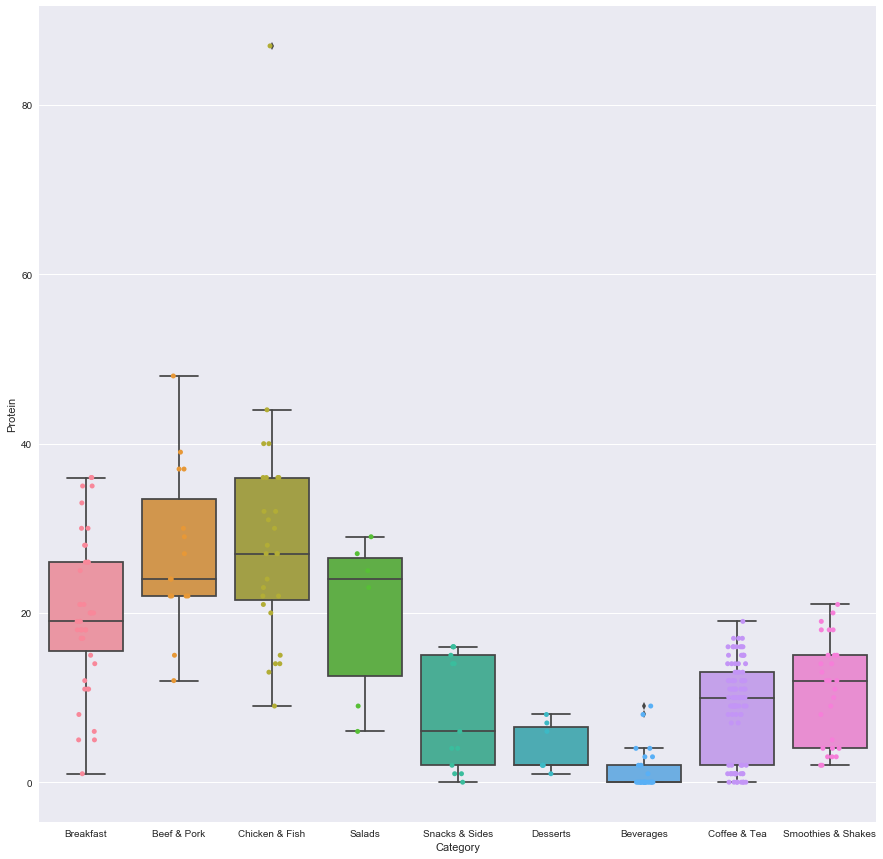

In [23]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x='Category', y='Protein', data=mcdonalds)
ax = sns.stripplot(x='Category', y='Protein', data=mcdonalds, jitter = True, edgecolor="black")

# Trans Fat Comparisons Based on Category

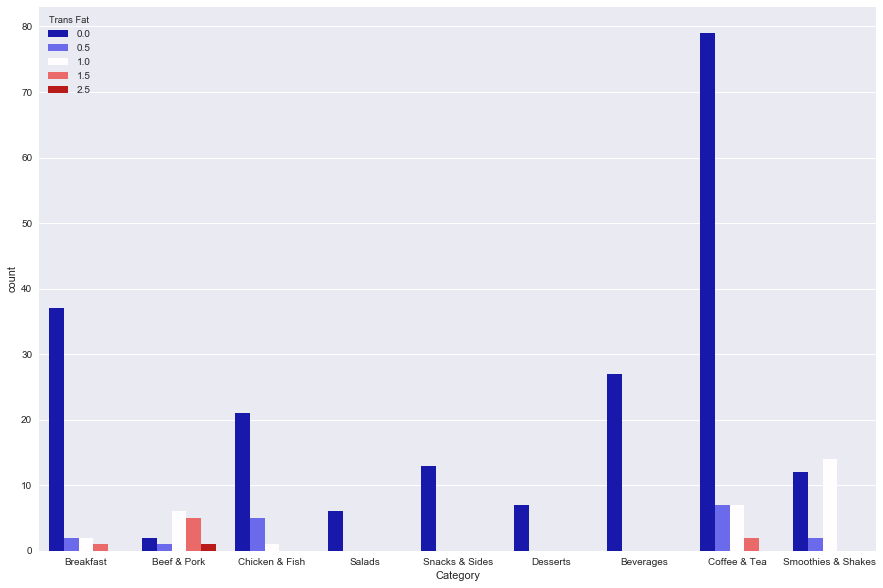

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category',data=mcdonalds, hue='Trans Fat',palette='seismic')

It turns out that Coffee & Tea has the least amount of trans fat. In comparison, their meats have the highest
amounts of trans fat. 

# Looking for Cholesterol Counts

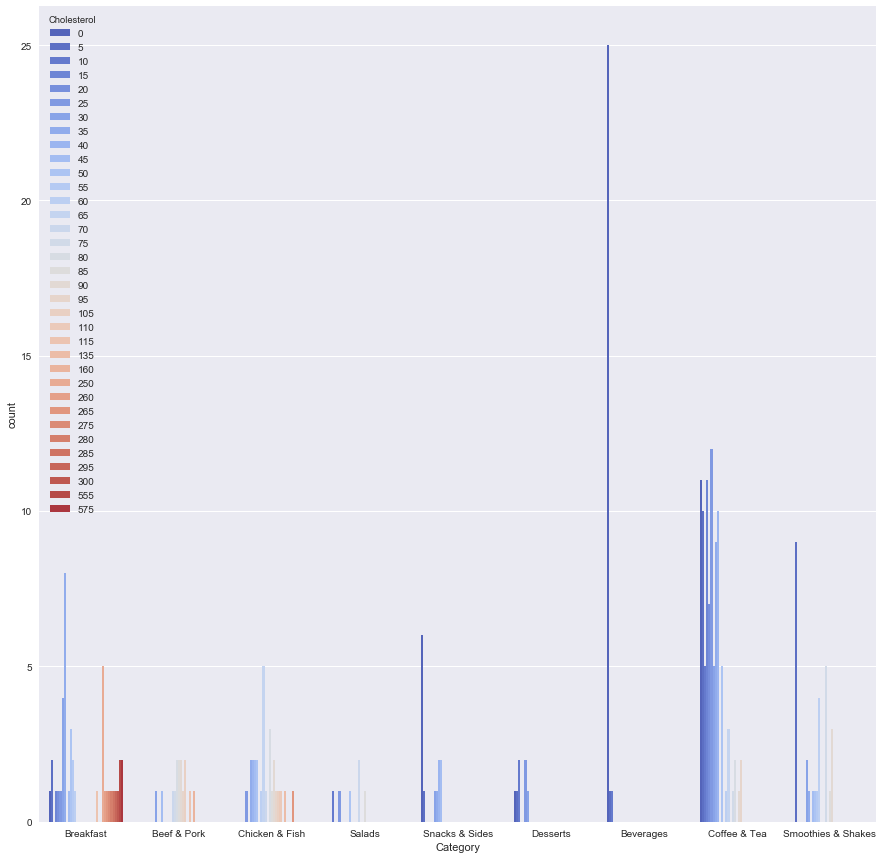

In [25]:
plt.figure(figsize=(15,15))
sns.countplot(x='Category',data=mcdonalds, hue='Cholesterol',palette='coolwarm')

Based on the information that is given, it turns out that breakfast has the highest amounts of cholesterol, then it involves with their poultry too. Beverages have the least amount of cholesterol.

# Total Amount of Calories in Food in Correlation to Trans Fat

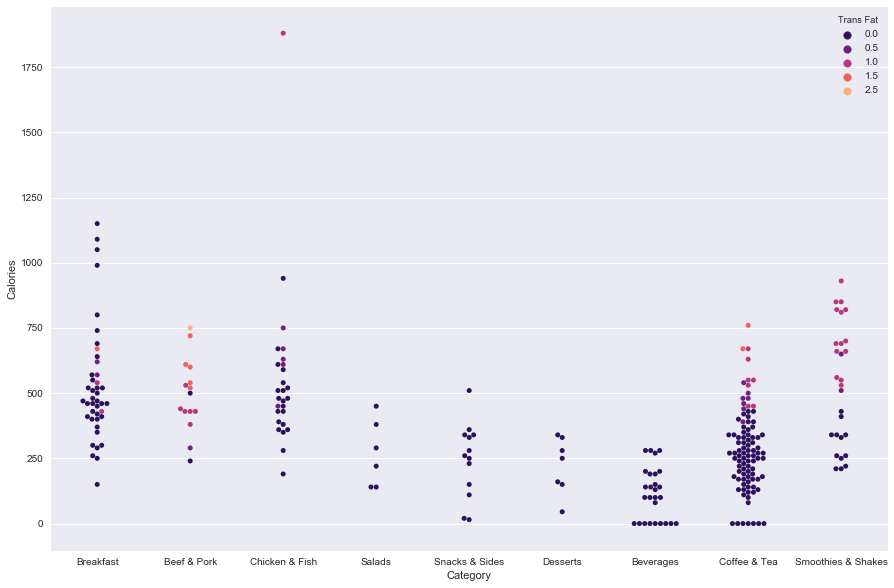

In [26]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Category',y='Calories',data=mcdonalds, hue='Trans Fat',palette='magma')

# Looking for Saturated Fats

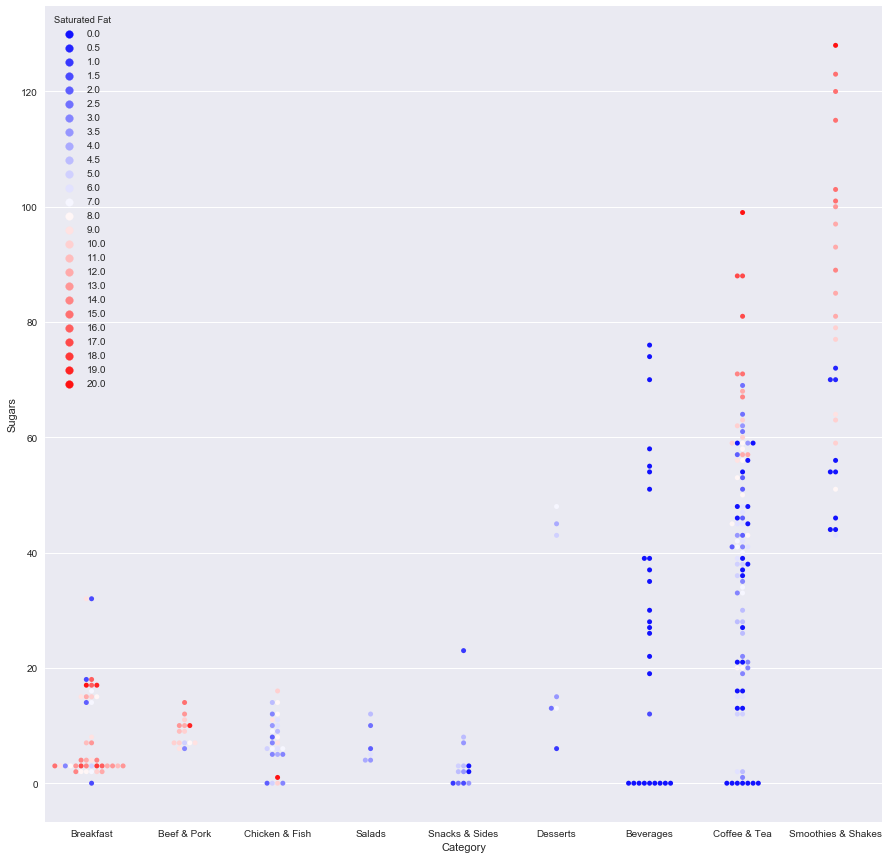

In [31]:
plt.figure(figsize=(15,15))
sns.swarmplot(x='Category',y='Sugars',data=mcdonalds, hue='Saturated Fat',palette='bwr')

It turns out that the smoothies have the highest amount of sugar and a high amount of saturated fat. It is unusual that for a smoothie that is made from scratch, it allows the consumer to choose the correct ingredients and to make a healthier option.

# Protein and Saturated Fat Correlation

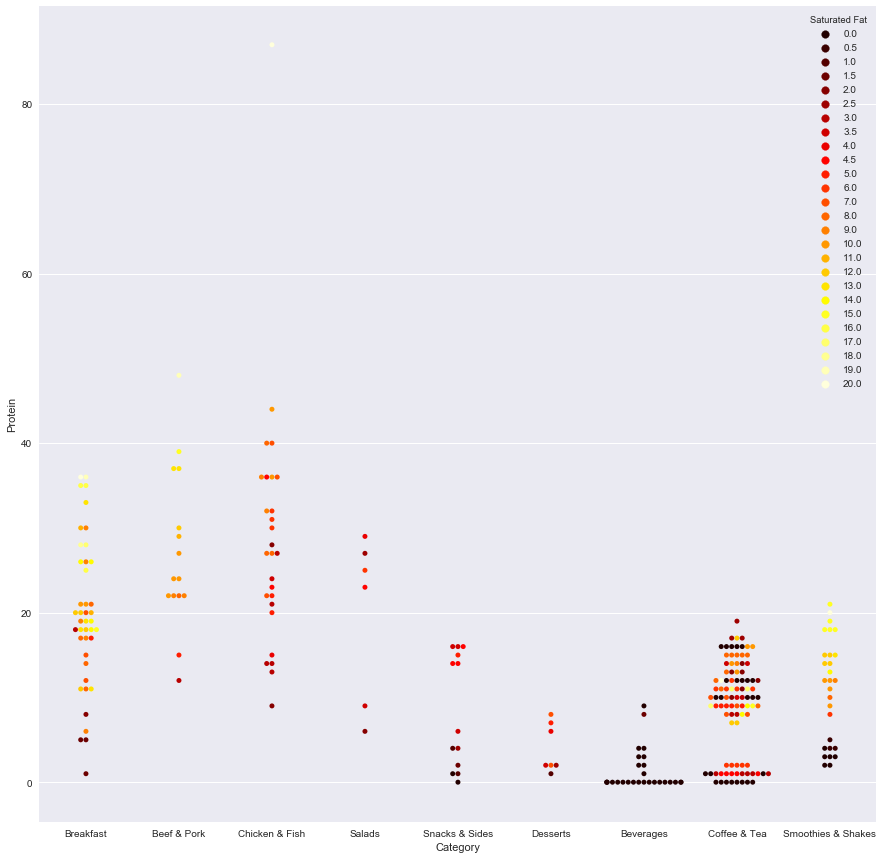

In [24]:
plt.figure(figsize=(15,15))
sns.swarmplot(x='Category',y='Protein',data=mcdonalds, hue='Saturated Fat',palette='hot')